Please add your personal information at the first cell by "Markdown" selection.
# 2024-Spring DS HW3
## Due: 2024/04/19 23:59
## 檔名請更為HW3_${學號}.ipynb 例如:HW3_111598084.ipynb


### Problem1:
- 請參考Lab5，繪製台積電在2023年的收盤價及開盤價的趨勢圖。


,Opening_price,Closing_price
date,,
2023-01-03,446.0,453.0
2023-01-04,449.5,449.5
2023-01-05,459.0,458.5
2023-01-06,455.0,458.5
2023-01-09,468.0,481.0
...,...,...
2023-12-25,582.0,581.0
2023-12-26,583.0,586.0
2023-12-27,587.0,592.0


<Axes: xlabel='date'>

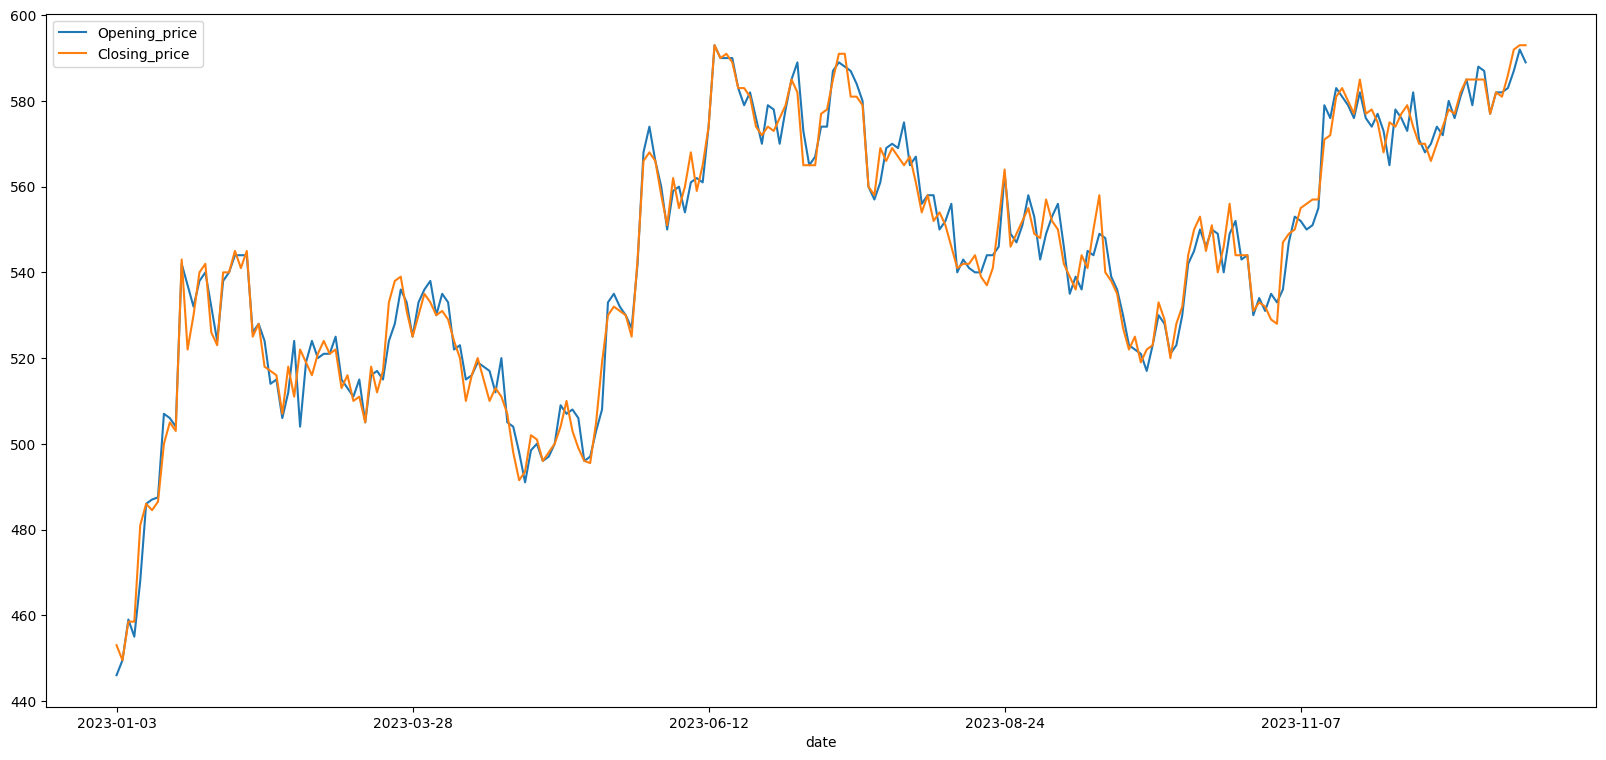

In [101]:
import pandas as pd
import requests
import time
import datetime
import os
import numpy as np


checkfile = os.path.isfile("DS_Hw3_111590004.csv")

def get2023_stock_file(): # Get 2023 stock file
    stock_data = pd.DataFrame()
    date = datetime.date(2023,1,2)
    for i in range(362):
        # 2023/01/02~2023/12/29 01/02是2023台股開盤第一天，12/29是台股封關日
        urldate = str(date).replace('-','')
        url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={urldate}&type=ALLBUT0999'
        request = requests.get(url)
        request_json = request.json()
        if request_json['stat'] == 'OK':
            stock = pd.DataFrame(request_json['data9'],columns=request_json['fields9'])
            stock['date'] = str(date)
            stock_data = pd.concat([stock_data,stock])
            print("Catch " + str(date) +" "+ str(len(stock['證券代號'])) )
        date += datetime.timedelta(days=1)
        time.sleep(3) #等待三秒，避免被股票網站ban
    # 因為使用Pycharm，所以這裡使用相對路徑，麻煩助教再批改作業時注意一下，有可能會使檔案儲存在其他位置
    stock_data.to_csv("DS_Hw3_111590004.csv")
    
if(checkfile == False): # 如果抓不到檔案那就開始爬資料
    get2023_stock_file()

stock_data = pd.read_csv("DS_Hw3_111590004.csv") #讀取CSV檔
stock_data_opening = stock_data[['date','證券名稱','開盤價']] #取得2023開盤價
stock_data_closing = stock_data[['date','證券名稱','收盤價']] #取得2023收盤價

stock_data_opening = stock_data_opening.rename(columns={'證券名稱':'Stock_name'}) #替換證券名稱
stock_data_opening = stock_data_opening.rename(columns={'開盤價':'Opening_price'}) #替換開盤價

stock_data_closing = stock_data_closing.rename(columns={'證券名稱':'Stock_name'}) #替換證券名稱
stock_data_closing = stock_data_closing.rename(columns={'收盤價':'Closing_price'}) #替換收盤價


stock_data_TSMC_opening = stock_data_opening[stock_data_opening['Stock_name'] == '台積電'] #取得台積電開盤價
stock_data_TSMC_closing = stock_data_closing[stock_data_closing['Stock_name'] == '台積電'] #取得台積電收盤價

#替換台積電開盤價的值以及取代掉,以及未開盤價格
stock_data_TSMC_opening = stock_data_TSMC_opening.loc[:,:]
stock_data_TSMC_opening['Opening_price'] = stock_data_TSMC_opening['Opening_price'].replace({',':'', '--':np.nan},regex=True)
stock_data_TSMC_opening['Opening_price'] = stock_data_TSMC_opening['Opening_price'].astype('float64')

#替換台積電收盤價的值以及取代掉,以及未開盤價格
stock_data_TSMC_closing = stock_data_TSMC_closing.loc[:,:]
stock_data_TSMC_closing['Closing_price'] = stock_data_TSMC_closing['Closing_price'].replace({',':'', '--':np.nan},regex=True)
stock_data_TSMC_closing['Closing_price'] = stock_data_TSMC_closing['Closing_price'].astype('float64')

#刪除台積電的名字
stock_data_TSMC_opening = stock_data_TSMC_opening.drop(columns=['Stock_name'],axis=1)
stock_data_TSMC_closing = stock_data_TSMC_closing.drop(columns=['Stock_name'],axis=1)

#合併開盤價以及收盤價
stock_data_TSMC_merge = pd.merge(stock_data_TSMC_opening,stock_data_TSMC_closing,on = 'date',how = 'left')

stock_data_TSMC_merge = stock_data_TSMC_merge.set_index('date')
# 製作圖表
display(stock_data_TSMC_merge)
stock_data_TSMC_merge.plot(figsize = (20,9))


### Problem2: 手寫過程在紙上後拍照用Markdown附上
- Construct a decision tree using ID3 algorithm for the database given in the following table.
- Please document your process and results on paper, then take a picture and post it in this file.

| RID | age | income | student | credit_rating | Class: buys_computer |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | youth | high | no | fair | no |
| 2 | youth | high | no | excellent | no |
| 3 | middle_aged | high | no | fair | yes |
| 4 | senior | medium | no | fair | yes |
| 5 | senior | low | yes | fair | yes |
| 6 | senior | low | yes | excellent | no |
| 7 | middle_aged | low | yes | excellent | yes |
| 8 | youth | medium | no | fair | no |
| 9 | youth | low | yes | fair | yes |
| 10 | senior | medium | yes | fair | yes |
| 11 | youth | medium | yes | excellent | yes |
| 12 | middle_aged | medium | no | excellent | yes |
| 13 | middle_aged | high | yes | fair | yes |
| 14 | senior | medium | no | excellent | no |

### Problem3: 參考Lab6
1. 請計算　台積電、聯發科和聯電　2023年的股價平均值?
2. 請分析2023/1/1-2023/12/31期間與台積電絕對值相關度排行第5名的股票是哪一支股票？劃出這兩支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))

In [ ]:
#Problem 3 Question 1

import pandas as pd
import requests
import time
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import numpy as np


checkfile = os.path.isfile("DS_Hw3_111590004.csv")

def get2023_stock_file(): # Get 2023 stock file
    stock_data = pd.DataFrame()
    date = datetime.date(2023,1,2)
    for i in range(362):
        # 2023/01/02~2023/12/29 01/02是2023台股開盤第一天，12/29是台股封關日
        urldate = str(date).replace('-','')
        url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={urldate}&type=ALLBUT0999'
        request = requests.get(url)
        request_json = request.json()
        if request_json['stat'] == 'OK':
            stock = pd.DataFrame(request_json['data9'],columns=request_json['fields9'])
            stock['date'] = str(date)
            stock_data = pd.concat([stock_data,stock])
            print("Catch " + str(date) +" "+ str(len(stock['證券代號'])) )
        date += datetime.timedelta(days=1)
        time.sleep(3) #等待三秒，避免被股票網站ban
    # 因為使用Pycharm，所以這裡使用相對路徑，麻煩助教再批改作業時注意一下，有可能會使檔案儲存在其他位置
    stock_data.to_csv("DS_Hw3_111590004.csv")
if(checkfile == False): # 如果抓不到檔案那就開始爬資料
    get2023_stock_file()

stock_data = pd.read_csv("DS_Hw3_111590004.csv")

stock_data = stock_data.rename(columns={'證券名稱':'Stock_name'}) #替換證券名稱
stock_data = stock_data.rename(columns={'開盤價':'Opening_price'}) #替換開盤價
stock_data = stock_data.rename(columns={'收盤價':'Closing_price'}) #替換收盤價

# 替換掉收盤價無法計算的值，以及將收盤價替換成浮點數
stock_data['Closing_price'] = stock_data['Closing_price'].replace({'\$':'' , ',':'', '--':np.nan},regex=True) 
stock_data = stock_data.dropna()
stock_data['Closing_price'] = stock_data['Closing_price'].astype('float64')
stock_data = stock_data[stock_data['Stock_name'] != '富邦上証+R']

stock_data_p1 = stock_data.loc[:,:]
# 取出股票名稱以及收盤價
stock_data_p1 = stock_data_p1[['date','Stock_name','Closing_price']]

stock_data_p1 = stock_data_p1.groupby('Stock_name')

stock_data_TSMC = stock_data_p1.get_group('台積電')
stock_data_UMC = stock_data_p1.get_group('聯電')

#計算台積電與聯電收盤價平均值
print("以下是台積電與聯電在2023的收盤價平均值")
print(f"台積電(2330)在2023的收盤價平均值為 {stock_data_TSMC.Closing_price.mean()}")
print(f"聯電(2303)在2023的收盤價平均值為 {stock_data_UMC.Closing_price.mean()}")

# Problem3 Question 2
stock_data_TSMC_closing = stock_data_TSMC_closing.reset_index(drop=True)

stock_data_TSMC_corr = pd.DataFrame()
stock_name = stock_data['Stock_name'].drop_duplicates()
stock_data_TSMC_corr['Stock_name'] = stock_name
stock_data_TSMC_corr['corr'] = 0.0

def get_corr(x):
    corr_company = stock_data[stock_data['Stock_name'] == x].reset_index(drop=True)
    return stock_data_TSMC_closing['Closing_price'].corr(corr_company['Closing_price'])

#計算相關係數，會跳出Degree of freedom <= 0 的警告，可以忽略 (00625K富邦上証+R 由於整年只有一日有成交紀錄，故在此會報錯，已於前面drop掉)
stock_data_TSMC_corr['corr'] = stock_data_TSMC_corr['Stock_name'].apply(get_corr)
stock_data_TSMC_corr = stock_data_TSMC_corr.sort_values('corr', ascending=False)

# 重新整理索引，並且顯示相關係數排行
stock_data_TSMC_corr = stock_data_TSMC_corr.reset_index(drop=True)

CORR006203 = stock_data_TSMC_corr.iat[4,1]
CORR00692 = stock_data_TSMC_corr.iat[5,1]

print(f"相關係數排名在未除去台積電的狀況下為006203元大MSCI台灣，相關係數為{CORR006203}")
print(f"相關係數排名在除去台積電的狀況下為00692富邦公司治理，相關係數為{CORR00692}")

#包含台積電，相關係數排名第五
stock_data_006203_closing = stock_data_p1.get_group('元大MSCI台灣')
#不包含台積電，相關係數排名第五
stock_data_00692_closing = stock_data_p1.get_group('富邦公司治理')

stock_data_2330_00692 = pd.merge(stock_data_TSMC_closing[['date','Closing_price']],stock_data_00692_closing[['date','Closing_price']],on = 'date',suffixes=('_2330', '_00692'))

stock_data_2330_006203 = pd.merge(stock_data_TSMC_closing[['date','Closing_price']],stock_data_006203_closing[['date','Closing_price']],on = 'date',suffixes=('_2330', '_006203'))

newdate_00692 = pd.to_datetime(list(stock_data_2330_00692.date))
newdate_006203 = pd.to_datetime(list(stock_data_2330_006203.date))

stock_data_2330_00692 = stock_data_2330_00692.set_index('date')
stock_data_2330_006203 = stock_data_2330_006203.set_index('date')

print()
print("以下是未去除台積電的台積電股價相關排名第五名股價以及台積電股價圖，第五名為006203 元大MSCI台灣")
fig = plt.figure(figsize=(7,7)) #調整大小
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  #調整日期
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.plot(newdate_006203,stock_data_2330_006203['Closing_price_2330'],label = 'TSMC') #設定標籤
plt.plot(newdate_006203,stock_data_2330_006203['Closing_price_006203'],label = '006203')
plt.xlabel('Date') #設定X軸座標
plt.ylabel('Closing_price') #設定Y軸座標
plt.title('006203 and 2330 stock closing prices') #設定標題
plt.legend(loc = 'best') #設定圖例
plt.show()

print()
print("以下是去除台積電的台積電股價相關排名第五名股價以及台積電股價圖，第五名為00692 富邦公司治理")
plt.figure(figsize=(7,7)) #調整大小
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  #調整日期
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(newdate_00692,stock_data_2330_00692['Closing_price_2330'],label = 'TSMC') #設定標籤
plt.plot(newdate_00692,stock_data_2330_00692['Closing_price_00692'],label = '00692')
plt.xlabel('Date') #設定X軸座標
plt.ylabel('Closing_price') #設定Y軸座標
plt.title('00692 and 2330 stock closing prices') #設定標題
plt.legend(loc = 'best')  #設定圖例
plt.show()

print("由於圖片時間刻度有調整過，所以會出現到2024-01很正常，因為區間會超過QQ")

以下是台積電與聯電在2023的收盤價平均值
台積電(2330)在2023的收盤價平均值為 543.4518828451883
聯電(2303)在2023的收盤價平均值為 48.77991631799163
